In [132]:
list.files()

[1] "20181802_draft_figure4.png"       "20190217_gwasid_for_smrheidi.txt"
 [3] "20190217_smrh_4529.csv"           "20190217_smrh_4530.csv"          
 [5] "20190218_anthro_to_remove.txt"    "20190218_smrh_4529.csv"          
 [7] "20190226_anthro_to_remove.txt"    "20190226_gpc1_v3.csv"            
 [9] "20190226_gpc2_v3.csv"             "20190226_sig_desc.txt"           
[11] "20190226_smr_heidi_all_sign.txt"  "20190226_smr_heidi.pdf"          
[13] "20190227_smr_heidi_all_sign.txt"  "20190227_smr_heidi.pdf"          
[15] "20190228_smr_heidi.pdf"           "gpc1_OA.sh"                      
[17] "gpc1_out_v2.csv"                  "gpc1_out_v2.html"                
[19] "gpc1_out_v2.log"                  "gpc1_out_v4.csv"                 
[21] "gpc1_out_v4.html"                 "gpc1_out_v4.log"                 
[23] "gpc1_out.txt.csv"                 "gpc1_out.txt.html"               
[25] "gpc1_out.txt.log"                 "gpc1_sox5.csv"                   
[27] "gpc1_sox5.html"                   "gpc1_sox5.log"                   
[29] "gpc1_sox5.sh"                     "gpc1.sh"                         
[31] "gpc2_OA.sh"                       "gpc2_out_v2.csv"                 
[33] "gpc2_out_v2.html"                 "gpc2_out_v2.log"                 
[35] "gpc2_out_v4.csv"                  "gpc2_out_v4.html"                
[37] "gpc2_out_v4.log"                  "gpc2_out.log"                    
[39] "gpc2_out.txt.csv"                 "gpc2_out.txt.html"               
[41] "gpc2_out.txt.log"                 "gpc2.sh"                         
[43] "gpc4.sh"                          "report_smrheidi_OA.sh"           
[45] "report_smrheidi.sh"               "smr_heidi_results.ipynb"         
[47] "snp_list_gpc1_1snp.txt"           "snp_list_gpc1.txt"               
[49] "snp_list_gpc2.txt"                "snp_list_gpc4.txt"               
[51] "snp_list.txt"                     "tmp.sh"                          
[53] "tmp.txt"

In [133]:
library(data.table)

In [134]:
g1=fread("20190226_gpc1_v3.csv",header=T,stringsAsFactors = F,sep=",",data.table=F)
g1=g1[(g1$version==3),]
dim(g1)
g2=fread("20190226_gpc2_v3.csv",header=T,stringsAsFactors = F,sep=",",data.table=F)
g2=g2[(g2$version==3),]
dim(g2)
g1$marker_snp_id=paste0("rs",g1$marker_snp_id)
g2$marker_snp_id=paste0("rs",g2$marker_snp_id)

[1] 10564    30

[1] 2357   30

In [135]:
#g1=fread("gpc1_out_v2.csv",header=T,stringsAsFactors = F,sep=",",data.table=F)

In [136]:
#g2=fread("gpc2_out_v2.csv",header=T,stringsAsFactors = F,sep=",",data.table=F)

In [137]:
gids=read.table("20190217_gwasid_for_smrheidi.txt",header=F)
gids=gids[,1]
length(gids)

[1] 2358

In [138]:
gids[1:5]

[1] 1282537    4529    4530    4531    4533

In [139]:
desc=fread("../20190212_descriptors_v2.txt",header=T,sep="\t",stringsAsFactors = F,data.table=F)
dim(desc)
desc[4568,"gwas_id"]=1282537
desc[4568,"trait_abbreviation"]="Healthspan"

[1] 4567   44

In [140]:
toRemove=fread("20190226_anthro_to_remove.txt",header=T,sep="\t",stringsAsFactors = F,data.table=F)

In [141]:
table(gids%in%desc$gwas_id)
gids_tr=desc[which((desc$gwas_id)%in%gids),"trait_abbreviation"]
length(gids_tr)


TRUE 
2358 

[1] 2358

In [142]:
g1=g1[g1$gwas_id_2%in%gids,]
g2=g2[g2$gwas_id_2%in%gids,]

dim(g1)
dim(g2)

[1] 10564    30

[1] 2357   30

In [143]:
table(g1$marker_snp_id,exclude = F)


rs12705966 rs13107325  rs3737240 rs73581580  rs7628207 
      2353       2354       2354       1148       2355 

In [144]:
table(g2$marker_snp_id,exclude = F)


rs143384 
    2357 

In [145]:
#g2=g2[(g2$Index_SNP=="rs143384"),]

In [146]:
#table(table(g2$Secondary_Trait==1))

In [147]:
#summary(g2$p_HEIDI)

In [148]:
snps=c("rs3737240",#,1,150483355
"rs7628207",#",3,49754970
"rs13107325",#4,103188709
"rs12705966",#",7,114248851
"rs73581580")#,9,140251458

# opt1

In [149]:
head(g1,n=1)

,serial_id,marker_snp_id,top_snp_id,ea,ra,bp,chr,cm,gwas_id_1,eaf_1,⋯,r,beta_smr,se_smr,z_smr_sq,p_smr,n_heidi,snps_heidi,p_heidi,version,run_query
,<int>,<chr>,<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>,<dbl>,<int>,<chr>
41479,594460,rs13107325,13107325,C,T,103188709,4,0,4529,0.9256,⋯,1,3.573986,2.541229,1.977962,0.1596053,11,rs13107325; rs13105581; rs151404; rs1585606; rs230489; rs233821; rs151503; rs233817; rs233825; rs2851245; rs6846971,0.8350913,3,"{'gwas_id_1': 4529, 'gwas_id_2': 2219, 'snp_id': None, 'snp_list_file': 'snp_list_gpc1.txt', 'clumping': False, 'rewrite': True, 'version': '3', 'tag': None, 'maf_threshold': 0.03, 'z_threshold': 10, 'n_threshold': 0.9, 'pz_outliers': False, 'use_quality_snp_list': False, 'window': 500, 'ld_r2_threshold': 0.9, 'min_snps_for_heidi': 3, 'max_snps_for_heidi': 20, 'skip_existing_ld_data': False}"


In [150]:
x1=fread("gpc1_out_v4.csv",data.table=F)
dim(x1)
x2=fread("gpc2_out_v4.csv",data.table=F)
dim(x2)

[1]  5 31

[1]  1 31

In [151]:
colnames(x1)
colnames(g1)

[1] "Primary_Trait"           "Trait_Collection"       
 [3] "Source_PMID"             "N"                      
 [5] "Secondary_Trait(Trait2)" "Trait_collection_2"     
 [7] "Source_PMID_Trait2"      "N_Trait2"               
 [9] "Index_SNP"               "Chromosome"             
[11] "Position"                "Ref_Allele"             
[13] "Eff_Allele"              "beta_Trait"             
[15] "p_Trait"                 "Proxy_SNP"              
[17] "Proxy_Position"          "Proxy_Ref_Allele"       
[19] "Proxy_Eff_Allele"        "r_with_index_SNP"       
[21] "Proxy_beta_Trait"        "Proxy_z_score_Trait"    
[23] "Proxy_p_Trait"           "Proxy_beta_Trait2"      
[25] "Proxy_z_score_Trait2"    "Proxy_p_Trait2"         
[27] "beta_SMR"                "p_SMR"                  
[29] "p_HEIDI"                 "n_HEIDI"                
[31] "SNPs_HEIDI"

[1] "serial_id"     "marker_snp_id" "top_snp_id"    "ea"           
 [5] "ra"            "bp"            "chr"           "cm"           
 [9] "gwas_id_1"     "eaf_1"         "beta_1"        "se_1"         
[13] "z_1"           "p_1"           "gwas_id_2"     "eaf_2"        
[17] "beta_2"        "se_2"          "z_2"           "p_2"          
[21] "r"             "beta_smr"      "se_smr"        "z_smr_sq"     
[25] "p_smr"         "n_heidi"       "snps_heidi"    "p_heidi"      
[29] "version"       "run_query"

In [152]:
#table(g1$Trait_collection_2)

In [153]:
g1=g1[g1$marker_snp_id%in%snps,]

In [154]:
#tmp=g1[!(g1$Trait_collection_2%in%c("UKB_NealeLab","PAIN-3")),]
#tmp[(tmp$p_SMR<=1e-5),c(5,25:30)]

In [155]:
thr_smr=0.05/((2243+1)*6)
#thr_smr=1e-7

In [156]:
ind=which((g2$p_smr<=thr_smr)&(g2$p_heidi>=0.01))
tmp=g2[ind,"gwas_id_2"]
ind=which((g1$p_smr<=thr_smr)&(g1$p_heidi>=0.01))
tmp=c(tmp,g1[ind,"gwas_id_2"])
sig_gids=unique(tmp)
length(sig_gids)

[1] 79

In [157]:
sig_gids=sig_gids[!sig_gids%in%c(4529,4530,4531,4533)]
length(sig_gids)

[1] 77

In [158]:
#fwrite(x=desc[desc$gwas_id%in%sig_gids,],file="20190226_sig_desc.txt",sep="\t")

In [159]:
g1=g1[g1$gwas_id_2%in%sig_gids,]
g2=g2[g2$gwas_id_2%in%sig_gids,]

In [160]:
dim(g1)
dim(g2)
table(g2$marker_snp_id,exclude = F)
table(g1$marker_snp_id,exclude = F)

[1] 380  30

[1] 77 30


rs143384 
      77 


rs12705966 rs13107325  rs3737240 rs73581580  rs7628207 
        76         77         77         73         77 

In [161]:
table(colnames(g1)==colnames(g2))


TRUE 
  30 

In [162]:
G=rbind(g1,g2)

In [163]:
ind=match(G$gwas_id_2,desc$gwas_id)
length(ind)

[1] 457

In [164]:
G=cbind(G,trait_name=desc$trait_name[ind],trait_abbreviation=desc$trait_abbreviation[ind])

In [165]:
colnames(G)

[1] "serial_id"          "marker_snp_id"      "top_snp_id"        
 [4] "ea"                 "ra"                 "bp"                
 [7] "chr"                "cm"                 "gwas_id_1"         
[10] "eaf_1"              "beta_1"             "se_1"              
[13] "z_1"                "p_1"                "gwas_id_2"         
[16] "eaf_2"              "beta_2"             "se_2"              
[19] "z_2"                "p_2"                "r"                 
[22] "beta_smr"           "se_smr"             "z_smr_sq"          
[25] "p_smr"              "n_heidi"            "snps_heidi"        
[28] "p_heidi"            "version"            "run_query"         
[31] "trait_name"         "trait_abbreviation"

In [166]:
fwrite(x=G,file="20190227_smr_heidi_all_sign.txt",sep="\t")

In [167]:
thr_smr

[1] 3.713607e-06

# Figure

In [168]:
toRemove[toRemove$gwas_id%in%c(4159,4161),1:2]
toRemove=toRemove[!(toRemove$gwas_id%in%c(4159,4161)),]

,gwas_id,trait_name
,<int>,<chr>
35,4159,Getting up in morning
36,4161,Frequency of tiredness / lethargy in last 2 weeks


In [169]:
toRemove[!(toRemove$gwas_id%in%g1$gwas_id_2 | toRemove$gwas_id%in%g2$gwas_id_2),1:2]

,gwas_id,trait_name
,<int>,<chr>
13,3918,Usual walking pace


In [170]:
g1=g1[!(g1$gwas_id_2%in%toRemove$gwas_id),]
g2=g2[!(g2$gwas_id_2%in%toRemove$gwas_id),]

In [171]:
table(colnames(g1)==colnames(g2))


TRUE 
  30 

In [172]:
G=rbind(g1,g2)

In [173]:
library(tidyr)

# opt 2

In [174]:
dim(G)

[1] 188  30

In [175]:
x1=fread("gpc1_out_v4.csv",data.table=F)
dim(x1)
x2=fread("gpc2_out_v4.csv",data.table=F)
dim(x2)

[1]  5 31

[1]  1 31

In [176]:
colnames(G)

[1] "serial_id"     "marker_snp_id" "top_snp_id"    "ea"           
 [5] "ra"            "bp"            "chr"           "cm"           
 [9] "gwas_id_1"     "eaf_1"         "beta_1"        "se_1"         
[13] "z_1"           "p_1"           "gwas_id_2"     "eaf_2"        
[17] "beta_2"        "se_2"          "z_2"           "p_2"          
[21] "r"             "beta_smr"      "se_smr"        "z_smr_sq"     
[25] "p_smr"         "n_heidi"       "snps_heidi"    "p_heidi"      
[29] "version"       "run_query"

In [177]:
colnames(x1)==colnames(x2)

[1] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[16] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[31] TRUE

In [178]:
x3=rbind(x1,x2)
dim(x3)

[1]  6 31

In [179]:
table(x3$Index_SNP)



rs12705966 rs13107325   rs143384  rs3737240 rs73581580  rs7628207 
         1          1          1          1          1          1 

In [180]:
####

In [246]:
G1=G[,c("marker_snp_id","gwas_id_2","p_smr")]
G2=G[,c("marker_snp_id","gwas_id_2","p_heidi")]
G3=G[,c("marker_snp_id","gwas_id_2","beta_smr")]

In [247]:
colnames(G1)
colnames(x3)

[1] "marker_snp_id" "gwas_id_2"     "p_smr"

[1] "Primary_Trait"           "Trait_Collection"       
 [3] "Source_PMID"             "N"                      
 [5] "Secondary_Trait(Trait2)" "Trait_collection_2"     
 [7] "Source_PMID_Trait2"      "N_Trait2"               
 [9] "Index_SNP"               "Chromosome"             
[11] "Position"                "Ref_Allele"             
[13] "Eff_Allele"              "beta_Trait"             
[15] "p_Trait"                 "Proxy_SNP"              
[17] "Proxy_Position"          "Proxy_Ref_Allele"       
[19] "Proxy_Eff_Allele"        "r_with_index_SNP"       
[21] "Proxy_beta_Trait"        "Proxy_z_score_Trait"    
[23] "Proxy_p_Trait"           "Proxy_beta_Trait2"      
[25] "Proxy_z_score_Trait2"    "Proxy_p_Trait2"         
[27] "beta_SMR"                "p_SMR"                  
[29] "p_HEIDI"                 "n_HEIDI"                
[31] "SNPs_HEIDI"

In [248]:
G1=rbind(G1,data.frame(marker_snp_id=x3[,"Index_SNP"],gwas_id_2=99999,p_smr=x3[,"p_SMR"]))
G2=rbind(G2,data.frame(marker_snp_id=x3[,"Index_SNP"],gwas_id_2=99999,p_heidi=x3[,"p_HEIDI"]))
G3=rbind(G3,data.frame(marker_snp_id=x3[,"Index_SNP"],gwas_id_2=99999,beta_smr=x3[,"beta_SMR"]))

In [264]:
G1w <- spread(G1, marker_snp_id,p_smr)
G2w <- spread(G2, marker_snp_id,p_heidi)
G3w <- spread(G3, marker_snp_id,beta_smr)

In [265]:
dim(G1w)
dim(G2w)
dim(G3w)

[1] 33  7

[1] 33  7

[1] 33  7

In [266]:
G3w

gwas_id_2,rs12705966,rs13107325,rs143384,rs3737240,rs73581580,rs7628207
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
857,0.19136085,0.1187590,-0.76417937,0.113215738,-0.07932677,0.25181479
1136,0.52810898,1.0058182,-0.27012990,0.641047090,0.24874086,0.58178853
1444,-0.67595439,-0.7516946,0.52173776,0.206980984,-0.69099833,-1.77118712
1449,0.24700506,0.2747621,-0.67194351,0.175295443,-0.32450759,0.25626675
2344,-1.72960880,-2.4891120,1.39920575,59.699463019,NA,0.65228986
2622,-0.79790771,3.2449617,2.84622258,0.790791192,NA,-34.39211631
3429,-0.92916119,-0.4582903,0.09757362,0.000000000,-0.37788852,-1.28712518
3777,0.26845726,0.8895694,-0.23203639,0.667332302,0.40190689,1.52605175
3807,0.28630378,-1.6847939,0.60661864,-0.432446034,-1.05520108,-1.45876884


In [267]:
table(G1w[,1]==G2w[,1])
colnames(G1w)==colnames(G2w)
colnames(G1w)==colnames(G3w)
table(G1w[,1]==G3w[,1])


TRUE 
  33 

[1] TRUE TRUE TRUE TRUE TRUE TRUE TRUE

[1] TRUE TRUE TRUE TRUE TRUE TRUE TRUE


TRUE 
  33 

In [268]:
library(gplots)

In [269]:
rownames(G3w)=G3w[,1]

In [270]:
dim(desc)
desc[4569,"gwas_id"]=99999
desc[4569,"trait_name"]="Osteoartrosis"

[1] 4569   44

In [271]:
rownames(G3w)

[1] "857"   "1136"  "1444"  "1449"  "2344"  "2622"  "3429"  "3777"  "3807" 
[10] "3826"  "3838"  "3875"  "3906"  "4017"  "4049"  "4050"  "4051"  "4052" 
[19] "4058"  "4059"  "4081"  "4159"  "4161"  "4179"  "4236"  "4272"  "4273" 
[28] "4274"  "4287"  "4292"  "4295"  "4734"  "99999"

In [272]:
ind=match(rownames(G3w),desc$gwas_id)
rownames(G3w)=desc$trait_name[ind]
#1136

In [273]:
#write.table(x=desc[ind,],file="tmp.txt",col.names=T,row.names=F,quote=F,sep="\t")

In [274]:
G3w=G3w[,-1]
G2w=G2w[,-1]
G1w=G1w[,-1]

In [275]:
out_pp=array("",dim(G3w))
out_pp[G1w<=thr_smr & G2w>=0.01]="*"

In [276]:
G2w[3,3]

[1] 0.1471813

In [277]:
#G3w[is.na(G3w)]=0
G3w[G3w>4]=4
G3w[G3w<=(-4)]=-4
G3w=t(G3w)
out_pp=t(out_pp)

In [278]:
#colnames(G3w)
#ind=c(8,11,14,16,18,19,20,21,22,23,24,25,32,33,34,35,36,37,38,39,41,43,44,45)
#colnames(G3w)[ind]
#G3w=G3w[,-ind]
#out_pp=out_pp[,-ind]

In [279]:
colnames(G3w)

[1] "Diagnoses - main ICD10: M23 Internal derangement of knee"    
 [2] "Non-cancer illness code, self-reported: osteoarthritis"      
 [3] "Qualifications: College or University degree"                
 [4] "Diagnoses - main ICD10: M17 Gonarthrosis [arthrosis of knee]"
 [5] "Extracellular matrix protein 1"                              
 [6] "Thioredoxin domain-containing protein 12"                    
 [7] "Educational attainment"                                      
 [8] "Time spent watching television (TV)"                         
 [9] "Fluid intelligence score"                                    
[10] "Diastolic blood pressure, automated reading"                 
[11] "Prospective memory result"                                   
[12] "Basal metabolic rate"                                        
[13] "Age at first live birth"                                     
[14] "Forced vital capacity (FVC)"                                 
[15] "Body mass index (BMI)"                                       
[16] "Weight"                                                      
[17] "Overall health rating"                                       
[18] "Body fat percentage"                                         
[19] "Hip circumference"                                           
[20] "Standing height"                                             
[21] "Sleep duration"                                              
[22] "Getting up in morning"                                       
[23] "Frequency of tiredness / lethargy in last 2 weeks"           
[24] "Waist circumference"                                         
[25] "Alcohol intake frequency."                                   
[26] "Eosinophill percentage"                                      
[27] "Haemoglobin concentration"                                   
[28] "Haematocrit percentage"                                      
[29] "Monocyte percentage"                                         
[30] "Platelet crit"                                               
[31] "Red blood cell erythrocyte count"                            
[32] "Crohn's disease"                                             
[33] "Osteoartrosis"

In [285]:
G3w[,33]
t(G1w)[,33]
t(G2w)[,33]

rs12705966 rs13107325   rs143384  rs3737240 rs73581580  rs7628207 
 0.3216231  0.6326472 -0.4038484  0.8870026  0.1347202  0.4718959

rs12705966   rs13107325     rs143384    rs3737240   rs73581580    rs7628207 
5.146411e-02 1.138612e-05 6.134028e-04 1.676597e-05 2.904924e-01 2.734662e-03

rs12705966 rs13107325   rs143384  rs3737240 rs73581580  rs7628207 
 0.6415193  0.9330151  0.3869440  0.6440327  0.7088565  0.7346346

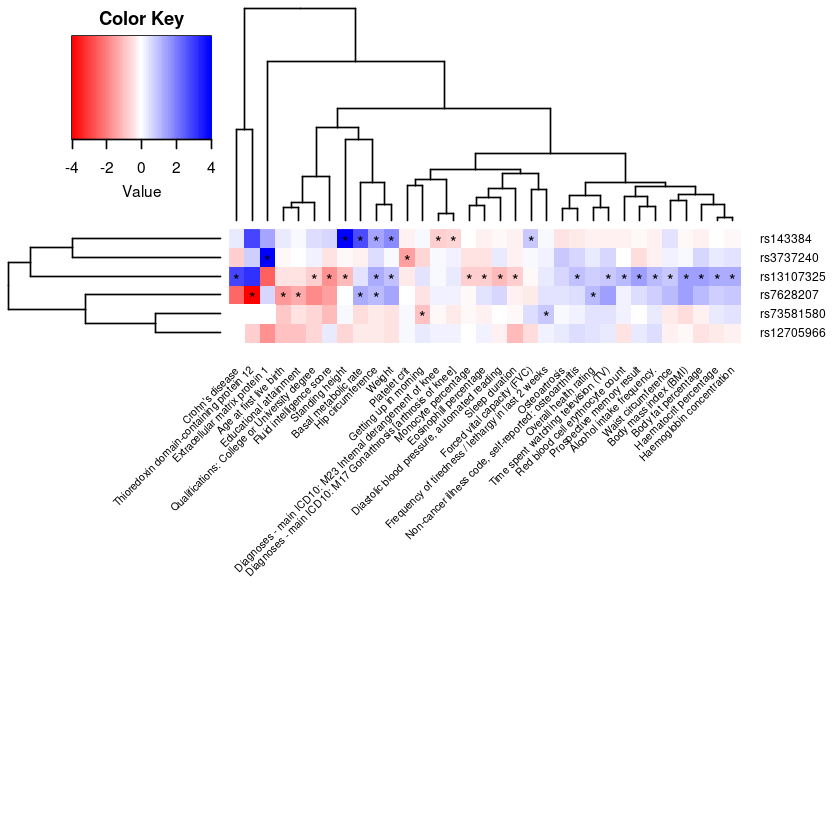

In [281]:
heatmap.2(as.matrix(G3w),cellnote = out_pp, 
          notecol="black",col=redblue(75),margins = c(25,5),density.info="none", trace="none",
          cexRow=0.7,srtCol=45,cexCol = 0.6)

In [1317]:
pdf(file = "20190228_smr_heidi.pdf",width = 10,height = 7)

heatmap.2(as.matrix(G3w),cellnote = out_pp, 
          notecol="black",col=redblue(75),margins = c(23,5),density.info="none", trace="none",
          cexRow=0.8,srtCol=45,cexCol = 0.8)

dev.off()

png 
  2

In [976]:
dev.off()

png 
  3

In [622]:
png(filename = "20181802_draft_figure4.png",width = 1920,height = 1080)
heatmap.2(as.matrix(G3w),cellnote = out_pp, 
          notecol="black",col=redblue(75),margins = c(40,7),density.info="none", trace="none",
          cexRow=1,srtCol=45,cexCol = 1)
dev.off()

png 
  2

In [617]:
dev.off()

png 
  3

In [697]:
desc[ind,30:40]

,gwas_array,trait_transformations,collection,use_terms,trait_variance,n_of_significant_p_value,date,unified_snps_count,ldsc_lambda_gc,ldsc_intercept,ldsc_intercept_se
841,"UK BiLEVE Axiom Array by Affymetrix1, UK Biobank Axiom",Phenotypes were converted into normally-distributed quantitative or a collection of binary (TRUE/FALSE) categorical variables using Hail. Categorizations of phenotype by PHESANT algorithm:Self-reported:0 || CAT-MUL-BINARY-VAR 1465 || Indicator name x135_0_0 || Remove indicator var NAs: 862 || Remove indicator var <0: 0 || Removed 0 examples != 1465 but with missing value (<0) || sample 461062/40718(501780) ||,UKB_NealeLab,"Our goal here is to make these results available as quickly as possible, for any geneticist, biologist or curious citizen to explore. In sharing these results as soon as they are produced, we hope to dramatically cut down the time researchers spend in obtaining GWAS results so that they may focus on all the other components that are less standardized across studies.",0.077452716,47,,10355842,1.140029,1.0274368,0.007393273
1149,"UK BiLEVE Axiom Array by Affymetrix1, UK Biobank Axiom",Phenotypes were converted into normally-distributed quantitative or a collection of binary (TRUE/FALSE) categorical variables using Hail. Categorizations of phenotype by PHESANT algorithm:6138_0 || CAT-MUL-BINARY-VAR 1 || NO_NAN Remove NA participants 4647 || Removed 5495 examples != 1 but with missing value (<0) || sample 331289/161211(492500) ||,UKB_NealeLab,"Our goal here is to make these results available as quickly as possible, for any geneticist, biologist or curious citizen to explore. In sharing these results as soon as they are produced, we hope to dramatically cut down the time researchers spend in obtaining GWAS results so that they may focus on all the other components that are less standardized across studies.",0.219221563,15015,,10355842,1.907786,1.1458310,0.012001969
1849,Affymetrix Axiom Array,inverse-normalisation,SomaLogic_2017,"All summary statistics and association data are freely available, accessible online on an integrated web-server at http://proteomics.gwas.eu. The informed consent given by the study participants does not cover posting of participant level phenotype and genotype data in public databases. However, data for KORA are available upon request from KORA-gen (http://epi.helmholtz-muenchen.de/kora-gen). Requests are submitted online and are subject to approval by the KORA board.",1.000000000,22,,499698,1.007097,1.0068542,0.007677050
2127,Affymetrix Axiom Array,inverse-normalisation,SomaLogic_2017,"All summary statistics and association data are freely available, accessible online on an integrated web-server at http://proteomics.gwas.eu. The informed consent given by the study participants does not cover posting of participant level phenotype and genotype data in public databases. However, data for KORA are available upon request from KORA-gen (http://epi.helmholtz-muenchen.de/kora-gen). Requests are submitted online and are subject to approval by the KORA board.",1.000000000,29,,499698,1.001014,0.9984518,0.008536100
3275,"UK BiLEVE Axiom Array by Affymetrix1, UK Biobank Axiom","Phenotypes were converted into normally-distributed quantitative or a collection of binary (TRUE/FALSE) categorical variables using Hail. Categorizations of phenotype by PHESANT algorithm:1070_0|| INTEGER || reassignments: -1=NA|-3=NA|-10=NA || CONTINUOUS || >20% IN ONE CATEGORY || Split into three bins: 0: <2, 1: [2,3), 2: >=3 ||cat N: 78577, 132779, 262480 || CAT-ORD || order: 0|1|2 || num categories: 3 ||",UKB_NealeLab,"Our goal here is to make these results available as quickly as possible, for any geneticist, biologist or curious citizen to explore. In sharing these results as soon as they are produced, we hope to dramatically cut down the time researchers spend in obtaining GWAS results so that they may focus on all the other components that are less standardized across studies.",0.565118485,29